In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
housing = pd.read_csv("housing.csv")

# Preping Database

### Calculating distance to LA and SF

In [3]:
LA_latitude = 34.052235  # Latitude of Los Angeles
LA_longitude = -118.243683  # Longitude of Los Angeles
SF_latitude = 37.774925
SF_longitude = -122.419420

In [4]:
def calcDeg(x):
    return (x/180)*np.pi

In [5]:
def haversine(lat1, lon1, lat2, lon2):
    """
    Calculate the great circle distance between two points 
    on the earth specified in radians.
    """
    # Radius of the Earth
    R = 6371.0  # Earth radius in kilometers
    
    # Convert latitude and longitude from degrees to radians
    lat1 = np.radians(lat1)
    lon1 = np.radians(lon1)
    lat2 = np.radians(lat2)
    lon2 = np.radians(lon2)
    
    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    distance = R * c
    
    return distance

### creating needed columns

In [6]:
housing["distance_LA"] = haversine(housing["latitude"], housing["longitude"], LA_latitude, LA_longitude)

In [7]:
housing["distance_SF"] = haversine(housing["latitude"], housing["longitude"], SF_latitude, SF_longitude)

In [8]:
housing["ratio_population_households"] = housing["population"]/housing["households"]

In [9]:
housing = housing[housing["ratio_population_households"]<=20]

In [10]:
housing["ratio_rooms_bedrooms"] = housing["total_rooms"]/housing["total_bedrooms"]

In [11]:
housing = housing.head(10000)

In [12]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,distance_LA,distance_SF,ratio_population_households,ratio_rooms_bedrooms
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,556.529158,20.329379,2.555556,6.821705
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,554.279850,19.908287,2.109842,6.418626
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,554.610717,17.835639,2.802260,7.721053
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,555.194266,17.064293,2.547945,5.421277
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,555.194266,17.064293,2.181467,5.810714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9999,-121.00,39.09,7.0,439.0,84.0,246.0,80.0,3.0781,162500.0,INLAND,611.780327,191.485974,3.075000,5.226190
10000,-121.08,39.02,13.0,1839.0,275.0,752.0,270.0,4.2031,209600.0,INLAND,607.649644,181.080643,2.785185,6.687273
10001,-121.07,39.05,10.0,1813.0,311.0,827.0,287.0,3.6087,182100.0,INLAND,610.292845,184.182930,2.881533,5.829582
10002,-121.07,39.04,9.0,2374.0,372.0,884.0,333.0,4.5042,206400.0,INLAND,609.287617,183.333626,2.654655,6.381720


In [13]:
housing.to_csv("prepared.csv",index=True,index_label='index')

# Histograms

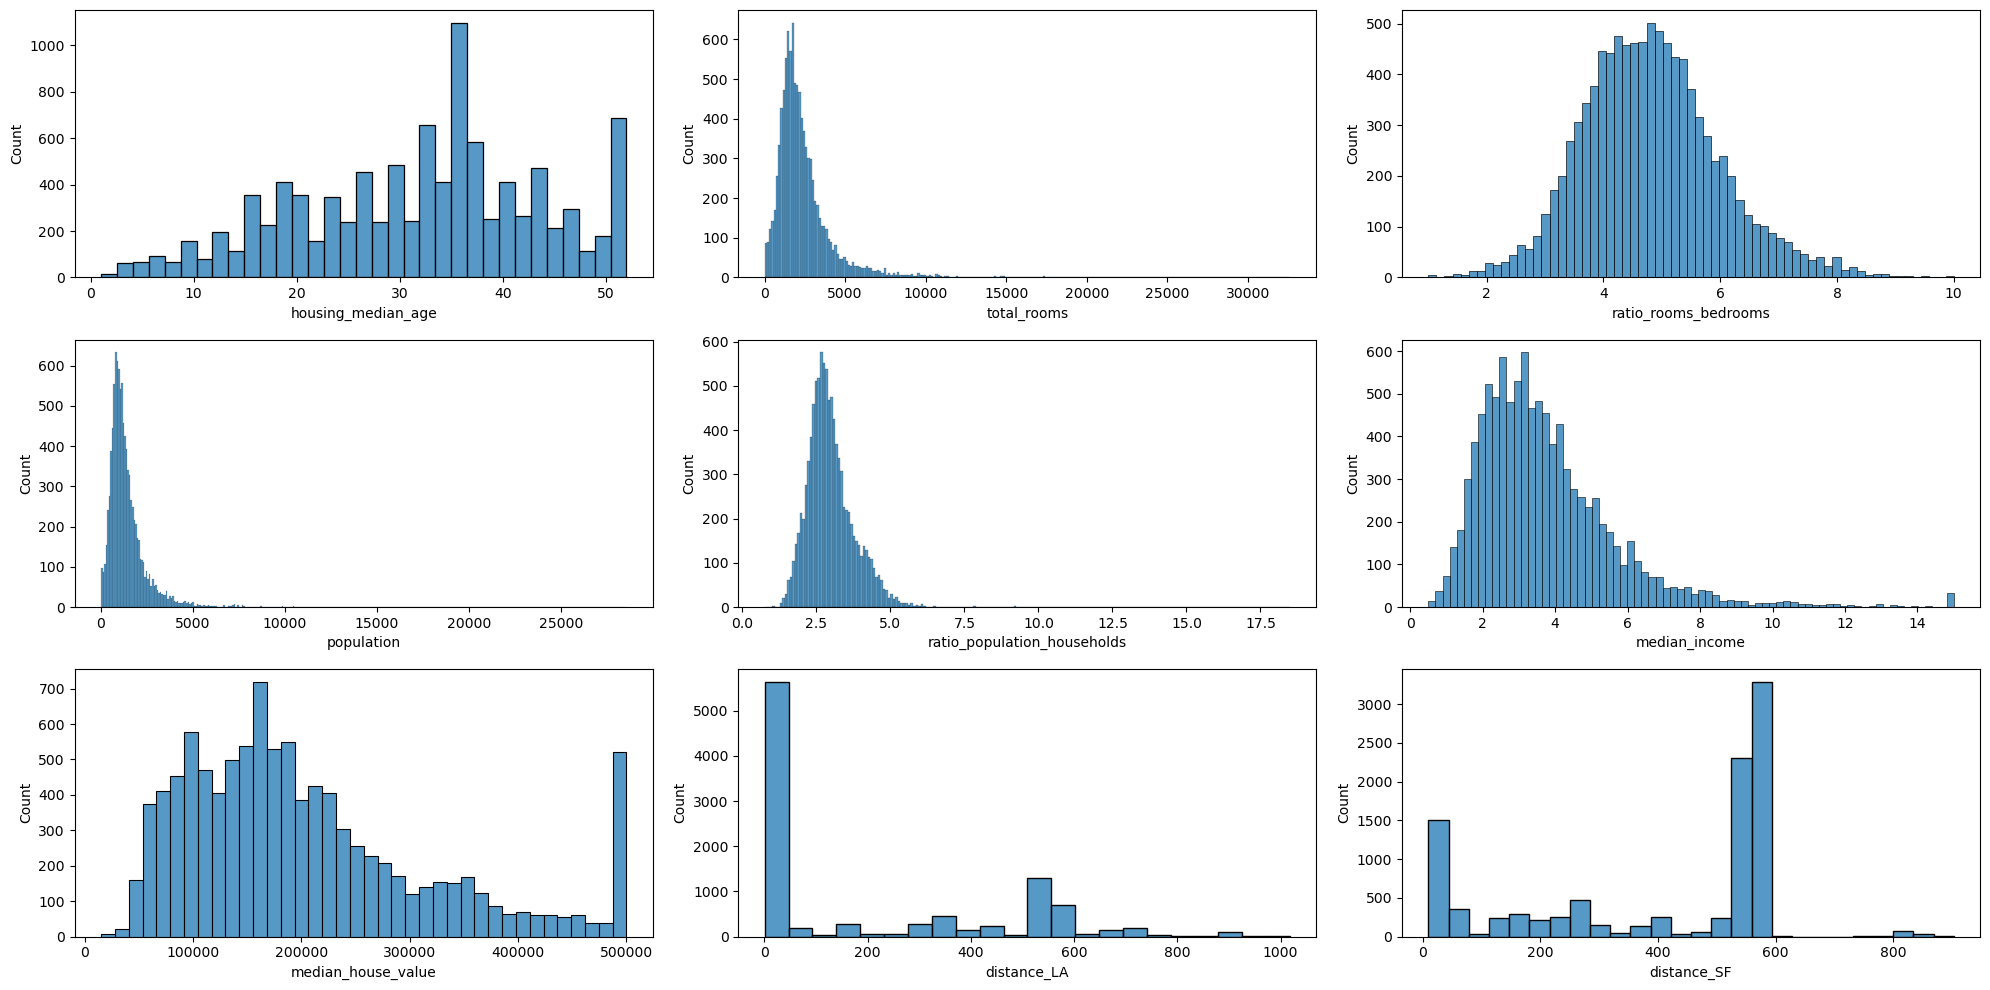

In [14]:
# age = sns.histplot(data = housing["housing_median_age"],ax=ax[0][0])
# rooms = sns.histplot(data = housing["total_rooms"],ax=ax[0][1])
# # bedrooms = sns.histplot(data = housing["total_bedrooms"])
# ratio_rooms_bedrooms = sns.histplot(data = housing["ratio_rooms_bedrooms"],ax=ax[0][2])
# population = sns.histplot(data = housing["population"],ax=ax[1][0])
# # households = sns.histplot(data = housing["households"])
# ratio_population_households = sns.histplot(data = housing["ratio_population_households"],ax=ax[1][1])
# median_income = sns.histplot(data = housing["median_income"],ax=ax[1][2])
# median_house_value = sns.histplot(data = housing["median_house_value"],ax=ax[2][0])
# distanceLA = sns.histplot(data = housing["distance_LA"],ax=ax[2][1])
# distanceSF = sns.histplot(data = housing["distance_SF"],ax=ax[2][2])
# # sns.histplot(data = housing["housing_median_age"])
fig = plt.figure(figsize=(20, 10))

plt.subplot(3, 3, 1)
sns.histplot(data=housing["housing_median_age"])
plt.subplot(3, 3, 2)
sns.histplot(data=housing["total_rooms"])
plt.subplot(3, 3, 3)
sns.histplot(data=housing["ratio_rooms_bedrooms"])
plt.subplot(3, 3, 4)
sns.histplot(data=housing["population"])
plt.subplot(3, 3, 5)

sns.histplot(data=housing["ratio_population_households"])
plt.subplot(3, 3, 6)

sns.histplot(data=housing["median_income"])
plt.subplot(3, 3, 7)

sns.histplot(data=housing["median_house_value"])
plt.subplot(3, 3, 8)

sns.histplot(data=housing["distance_LA"])
plt.subplot(3, 3, 9)

sns.histplot(data=housing["distance_SF"])

plt.tight_layout()
plt.savefig("plots.png")

plt.show()


# Min Max

In [15]:
print("housing_median_age min",housing["housing_median_age"].min()," max: ",housing["housing_median_age"].max())
print("total_rooms min",housing["total_rooms"].min()," max: ",housing["total_rooms"].max())
print("ratio_rooms_bedrooms min",housing["ratio_rooms_bedrooms"].min()," max: ",housing["ratio_rooms_bedrooms"].max())
print("population min",housing["population"].min()," max: ",housing["population"].max())
print("ratio_population_households min",housing["ratio_population_households"].min()," max: ",housing["ratio_population_households"].max())
print("median_income min",housing["median_income"].min()," max: ",housing["median_income"].max())
print("median_house_value min",housing["median_house_value"].min()," max: ",housing["median_house_value"].max())
print("distance_LA min",housing["distance_LA"].min()," max: ",housing["distance_LA"].max())
print("distance_SF min",housing["distance_SF"].min()," max: ",housing["distance_SF"].max())


housing_median_age min 1.0  max:  52.0
total_rooms min 2.0  max:  32627.0
ratio_rooms_bedrooms min 1.0  max:  10.0
population min 3.0  max:  28566.0
ratio_population_households min 0.75  max:  18.5
median_income min 0.4999  max:  15.0001
median_house_value min 14999.0  max:  500001.0
distance_LA min 0.4205891085617027  max:  1018.2601192603873
distance_SF min 9.456800231679946  max:  902.8381699649739


# $\mu$ Functions

In [16]:
def triangle(a,b,c):
    def func(x):
        """
    Calculate the triangular membership function value for a given input x.

    Parameters:
    x (float): Input value.
    a (float): Start of the triangle (left foot).
    b (float): Peak of the triangle.
    c (float): End of the triangle (right foot).

    Returns:
    float: Membership value.
    """
        if a < x < b:
            return (x - a) / (b - a)
        elif b <= x < c:
            return (c - x) / (c - b)
        elif x == b:
            return 1.0
        else:
            return 0.0
    return func
            
def trapezoidal(a,b,c,d):
    def func(x):
        """
    Calculate the trapezoidal membership function value for a given input x.

    Parameters:
    x (float): Input value.
    a (float): Start of the trapezoid (left foot).
    b (float): Start of the top of the trapezoid (left shoulder).
    c (float): End of the top of the trapezoid (right shoulder).
    d (float): End of the trapezoid (right foot).

    Returns:
    float: Membership value.
    """
        if a < x < b:
            return (x - a) / (b - a)
        elif b <= x <= c:
            return 1.0
        elif c < x < d:
            return (d - x) / (d - c)
        else:
            return 0.0
    return func
    pass
def gaussian(c,sigma):
    def func(x):
        return math.exp(-0.5 * ((x - c) / sigma) ** 2)
    return func


## Quantifiers

Quantifier function

In [18]:
def membership(value,functions):
    result = dict(map(lambda x: (x.__name__,x(value)),labels))
    return result
def show_plots(xs,funcs):
    for f in funcs:
        plt.plot(xs,list(map(lambda x: f(x),xs)))
    plt.legend(list(map(lambda f: f.__name__,funcs)))
    # plt.plot(items,list(map(lambda x: close_to_2000_3000(x),items)))
    plt.show()

### Absolute

Functions calculating membership to given label

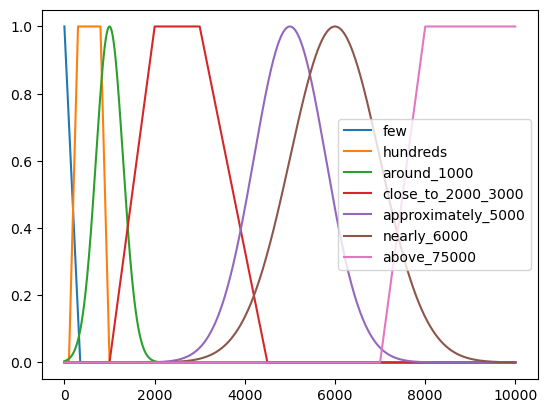

In [73]:
def few(x):
    # if 1 <= x <= 250:
    #     return -0.001 * x + 1
    # else:
    #     return 0
    return triangle(0,0,350)(x)

def hundreds(x):
    
    return trapezoidal(100,300,800,1000)(x)

def around_1000(x):
    
    # return triangle(700,1000,1500)(x)
    return gaussian(1000,300)(x)

def close_to_2000_3000(x):
    # if 1000 <= x < 2000:
    #     return (1/1000) * x - 1
    # elif 2000 <= x <= 3000:
    #     return 1
    # elif 3000 < x <= 4000:
    #     return -(1/1000) * x + 4
    # else:
    #     return 0
    return trapezoidal(1000,2000,3000,4500)(x)

def approximately_5000(x):
    # if 3500 <= x < 5000:
    #     return (1/1500) * x - 7/3
    # elif 5000 <= x <= 6000:
    #     return -(1/1000) * x + 6
    # else:
    #     return 0
    # return triangle(3500,5000,6000)(x)
    return gaussian(5000,800)(x)


def nearly_6000(x):
    # if 5000 <= x <= 6000:
    #     return (1/1000) * x - 5
    # elif 6000 < x <= 8000:
    #     return -(1/2000) * x + 4
    # else:
    #     return 0
    # return triangle(5000,6000,8000)(x)
    return gaussian(6000,1000)(x)

def above_75000(x):
    # if 7500 <= x < 9000:
    #     return ((17/37500000) * x)**2 + ((611/75000) * x) - (1780/(5*2))
    # elif 9000 <= x <= 10000:
    #     return 1
    # else:
    #     return 0
    return trapezoidal(7000,8000,11000,11000)(x)

labels = [few,hundreds,around_1000,close_to_2000_3000,approximately_5000,nearly_6000,above_75000]
items = np.arange(0,10000)
show_plots(items,labels)

## Relative

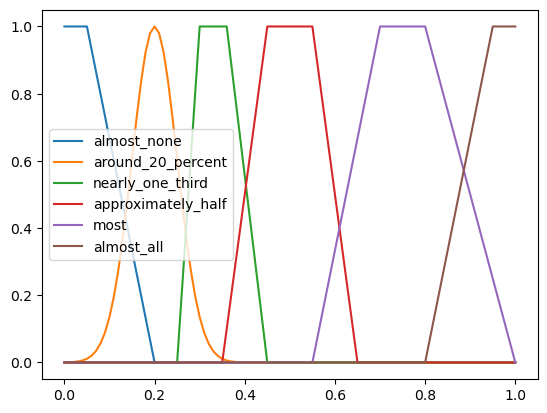

In [76]:
def almost_none(x):
    # if 0 <= x <= 0.05:
    #     return 1
    # elif 0.05 < x <= 0.15:
    #     return -10 * x + 1.5
    # else:
    #     return 0
    return trapezoidal(0,0,0.05,0.2)(x)

def around_20_percent(x):
    # if 0.1 <= x <= 0.2:
    #     return 10 * x - 1
    # elif 0.2 < x <= 0.3:
    #     return -10 * x + 3
    # else:
    #     return 0
    # return triangle(0.1,0.2,0.3)(x)
    return gaussian(0.2,0.05)(x)

    

def nearly_one_third(x):
    # if 0.25 <= x <= 0.3:
    #     return 20 * x - 5
    # elif 0.3 < x <= 0.36:
    #     return 1
    # elif 0.36 < x <= 0.41:
    #     return -20 * x + 8.2
    # else:
    #     return 0
    return trapezoidal(0.25,0.3,0.36,0.45)(x)

def approximately_half(x):
    # if 0.4 <= x <= 0.45:
    #     return 20 * x - 8
    # elif 0.45 < x <= 0.55:
    #     return 1
    # elif 0.55 < x <= 0.6:
    #     return -20 * x + 12
    # else:
    #     return 0
    return trapezoidal(0.35,0.45,0.55,0.65)(x)

def most(x):
    # if 0.55 <= x <= 0.7:
    #     return (349/121) * x**2 + (131/20) * x - (179/40)
    # elif 0.75 < x <= 0.8:
    #     return 1
    # else:
    #     return (157/100) * x**2 - (193/20) * x + (202/25)
    return trapezoidal(0.55,0.7,0.8,1)(x)

def almost_all(x):
    # if 0.8 <= x <= 0.95:
    #     return (45/128) * x**2 + (43/20) * x - (389/200)
    # elif 0.95 < x <= 1:
    #     return 1
    # else:
    #     return 0
    return trapezoidal(0.8,0.95,1,1)(x)
labels_relative = [almost_none,around_20_percent,nearly_one_third,approximately_half,most,almost_all]
show_plots(np.arange(0,1+0.01,0.01),labels_relative)

# Bedroom to room ratio

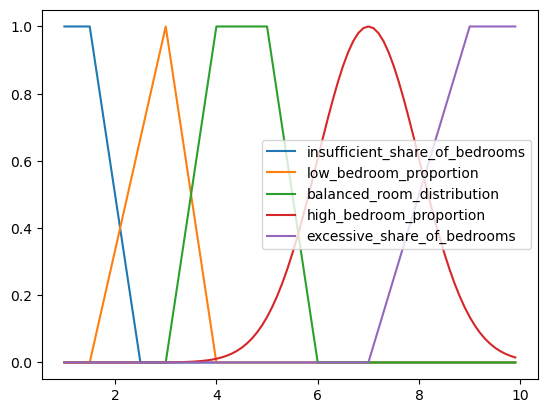

In [85]:
def insufficient_share_of_bedrooms(x):
    return trapezoidal(0,1,1.5,2.5)(x)

def low_bedroom_proportion(x):
    return triangle(1.5,3,4)(x)

def balanced_room_distribution(x):
    return trapezoidal(3,4,5,6)(x)

def high_bedroom_proportion(x):
   return gaussian(7,1)(x)

def excessive_share_of_bedrooms(x):
    return trapezoidal(7,9,10,10)(x)

bedroom_to_toom_ratio = [insufficient_share_of_bedrooms,
                         low_bedroom_proportion,
                         balanced_room_distribution,
                         high_bedroom_proportion
                         ,excessive_share_of_bedrooms
                        ]
show_plots(np.arange(1,10,0.1),bedroom_to_toom_ratio)

# Median house age

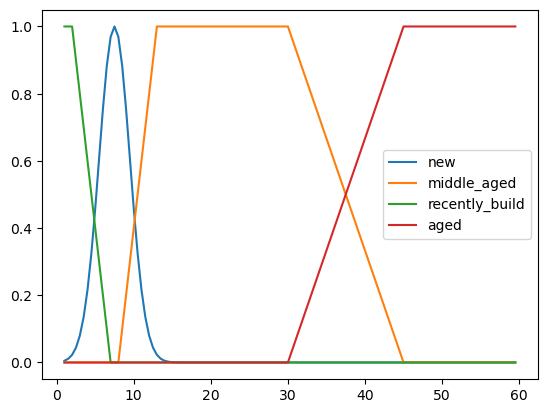

In [92]:
def recently_build(x):
    return trapezoidal(0,0,2,7)(x)

def new(x):
    # if 2 <= x <= 5:
    #     return 1/3 * x - 2/3
    # elif 5 < x < 10:
    #     return -1/5 * x + 2
    # else:
    #     return 0
    return gaussian(7.5,2)(x)
    # return triangle(2,5,10)(x)

def middle_aged(x):
    # if 5 <= x <= 11:
    #     return 1/48 * x**2 - 1/6 * x + 5/16
    # elif 11 < x <= 30:
    #     return 1
    # elif 30 < x <= 45:
    #     return 1/210 * x**2 - 89/210 * x + 66/7
    # else:
    #     return 0
    return trapezoidal(8,13,30,45)(x)
    # return gaussian(35,5)(x)

def aged(x):
    # if 30 <= x <= 45:
    #     return -1/180 * x**2 + 29/60 * x - 19/2
    # elif 45 < x <= 52:
    #     return 1
    # else:
    #     return 0
    return trapezoidal(30,45,60,60)(x)
median_house_age = [new,middle_aged,recently_build,aged]
show_plots(np.arange(1,60,0.5),median_house_age)

# Median household type

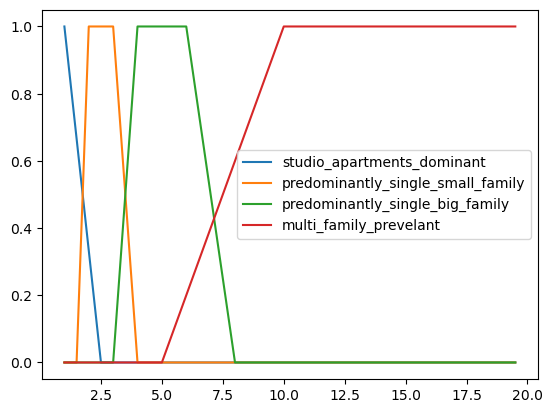

In [98]:
def studio_apartments_dominant(x):
    # if 0.75 <= x <= 1:
    #     return 1
    # elif 1 < x < 2:
    #     return -x + 2
    # else:
    #     return 0
    return trapezoidal(0,0,1,2.5)(x)

def predominantly_single_small_family(x):
    # if 1.5 <= x <= 2:
    #     return 2 * x - 3
    # elif 2 < x <= 3:
    #     return 1
    # elif 3 < x < 4:
    #     return -x + 4
    # else:
    #     return 0
    return trapezoidal(1.5,2,3,4)(x)

def predominantly_single_big_family(x):
    # if 3 <= x <= 4:
    #     return x - 3
    # elif 4 < x <= 5:
    #     return 1
    # elif 5 < x < 7:
    #     return -0.5 * x + 3.5
    # else:
    #     return 0
    return trapezoidal(3,4,6,8)(x)

def multi_family_prevelant(x):
    # if 5.5 <= x <= 12:
    #     return (6646/7475) * x**2 - (23031/1495) * x + 432311/7475
    # elif 12 < x <= 18.5:
    #     return 1
    # else:
    #     return 0
    return trapezoidal(5,10,21,21)(x)
median_household_type = [studio_apartments_dominant,predominantly_single_small_family,predominantly_single_big_family,multi_family_prevelant]
show_plots(np.arange(1,20,0.5),median_household_type)

# median income

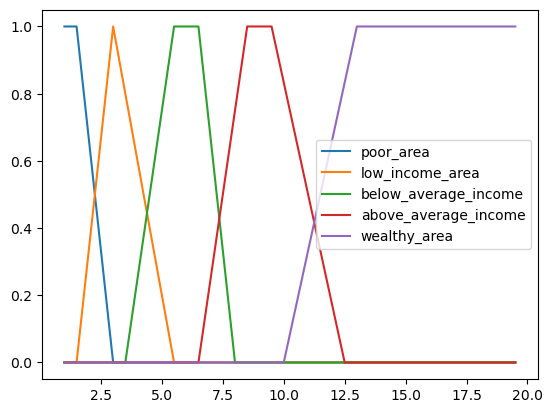

In [103]:
def poor_area(x):
    # if 0.49 <= x <= 1.5:
    #     return 1
    # elif 1.5 < x < 3:
    #     return -2/3 * x + 2
    # else:
    #     return 0
    return trapezoidal(0.49,0.49,1.5,3)(x)

def low_income_area(x):
    # if 1.5 <= x <= 3:
    #     return 2/3 * x - 1
    # elif 3 < x < 4.5:
    #     return -2/3 * x + 3
    # else:
    #     return 0
    return triangle(1.5,3,5.5)(x)

def below_average_income(x):
    # if 4 <= x <= 5.5:
    #     return 2/3 * x - 8/3
    # elif 5.5 < x <= 6.5:
    #     return 1
    # elif 6.5 < x < 8:
    #     return -2/3 * x + 16/3
    # else:
    #     return 0
    return trapezoidal(3.5,5.5,6.5,8)(x)

def above_average_income(x):
    # if 7 <= x <= 8.5:
    #     return 2/3 * x - 14/3
    # elif 8.5 < x <= 9.5:
    #     return 1
    # elif 9.5 < x < 11:
    #     return -2/3 * x + 22/3
    # else:
    #     return 0
    return trapezoidal(6.5,8.5,9.5,12.5)(x)

def wealthy_area(x):
    # if 10 <= x <= 13:
    #     return -1/30 * x**2 + 11/10 * x - 23/3
    # elif 13 < x <= 15:
    #     return 1
    # else:
    #     return 0
    return trapezoidal(10,13,20,20)(x)

median_income = [poor_area,low_income_area,below_average_income,above_average_income,wealthy_area]
show_plots(np.arange(1,20,0.5),median_income)

# population

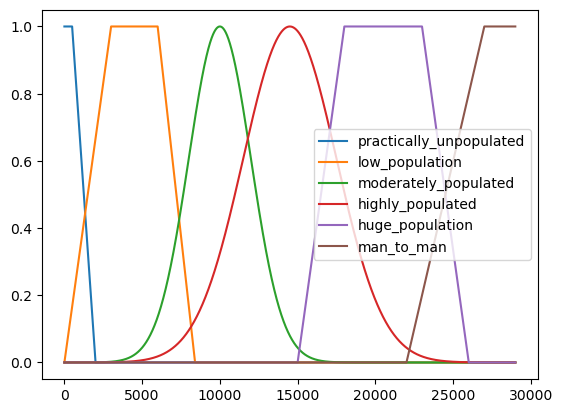

In [113]:
def practically_unpopulated(x):
    # if 3 <= x <= 400:
    #     return 1
    # elif 400 < x < 1000:
    #     return -1/600 * x + 5/3
    # else:
    #     return 0
    return trapezoidal(3,3,500,2000)(x)

def low_population(x):
    # if 400 <= x <= 3000:
    #     return 1/2600 * x - 2/13
    # elif 3000 < x <= 6000:
    #     return 1
    # elif 6000 < x < 8400:
    #     return -1/2400 * x + 7/2
    # else:
    #     return 0
    return trapezoidal(3,3000,6000,8400)(x)

def moderately_populated(x):
    # if 7000 <= x <= 10000:
    #     return 1/3000 * x + 7/3
    # elif 10000 < x < 13000:
    #     return -1/3000 * x + 13/3
    # else:
    #     return 0
    # return triangle(7000,10000,13000)(x)
    return gaussian(10000,2000)(x)

def highly_populated(x):
    # if 11000 <= x <= 13000:
    #     return 1/2000 * x - 11/2
    # elif 13000 < x <= 14000:
    #     return 1
    # elif 14000 < x < 16000:
    #     return -1/2000 * x + 8
    # else:
    #     return 0
    # return trapezoidal(11000,13000,14000,16000)(x)
    return gaussian(14500,3000)(x)


def huge_population(x):
    # if 15000 <= x <= 18000:
    #     return 1/3000 * x - 5
    # elif 18000 < x <= 23000:
    #     return 1
    # elif 23000 < x < 26000:
    #     return -1/3000 * x + 26/3
    # else:
    #     return 0
    return trapezoidal(15000,18000,23000,26000)(x)

def man_to_man(x):
    # if 22000 <= x <= 27000:
    #     return -1/42000000 * x**2 + 41/30000 * x - 649/35
    # elif 27000 < x <= 28566:
    #     return 1
    # else:
    #     return 0
    return trapezoidal(22000,27000,30000,30000)(x)
population = [practically_unpopulated,low_population,moderately_populated,highly_populated,huge_population,man_to_man]
show_plots(np.arange(3,29000,1),population)


# total rooms count in block groups

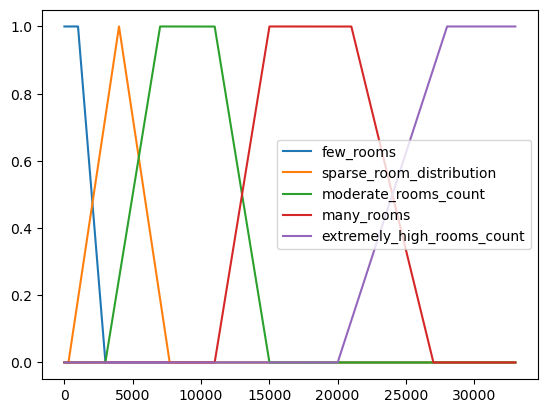

In [121]:
def few_rooms(x):
    # if 2 <= x <= 400:
    #     return 1
    # elif 400 < x < 1000:
    #     return -1/600 * x + 5/3
    # else:
    #     return 0
    return trapezoidal(2,2,1000,3000)(x)


def sparse_room_distribution(x):
    # if 400 <= x <= 2400:
    #     return 1/2000 * x - 1/5
    # elif 2400 < x < 4400:
    #     return -1/2000 * x + 11/5
    # else:
    #     return 0
    return triangle(300,4000,7700)(x)

def moderate_rooms_count(x):
    # if 3000 <= x <= 7000:
    #     return 1/4000 * x - 3/4
    # elif 7000 < x <= 11000:
    #     return 1
    # elif 11000 < x < 15000:
    #     return -1/4000 * x + 15/4
    # else:
    #     return 0
    return trapezoidal(3000,7000,11000,15000)(x)

def many_rooms(x):
    # if 11000 <= x <= 15000:
    #     return 1/4000 * x - 11/4
    # elif 15000 < x <= 21000:
    #     return 1
    # elif 21000 < x < 25000:
    #     return -1/4000 * x + 25/4
    # else:
    #     return 0
    return trapezoidal(11000,15000,21000,27000)(x)

def extremely_high_rooms_count(x):
    # if 22000 <= x <= 28000:
    #     return 1/37500000 * x**2 - 7/6000 * x + 319/25
    # elif 28000 < x <= 32627:
    #     return 1
    # else:
    #     return 0
    return trapezoidal(20000,28000,34000,34000)(x)

total_rooms_count = [few_rooms,sparse_room_distribution,moderate_rooms_count,many_rooms,extremely_high_rooms_count]
show_plots(np.arange(3,33000,1),total_rooms_count)


# median house value

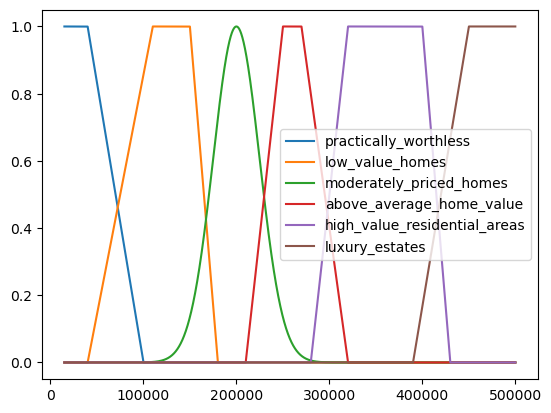

In [133]:
def practically_worthless(x):
    # if 14999 <= x <= 40000:
    #     return 1
    # elif 40000 < x <= 100000:
    #     return (17/3576000000) * x**2 - (2033/2980000) * x + (9245/447)
    # else:
    #     return 0
    return trapezoidal(14999,14999,40000,100000)(x)

def low_value_homes(x):
    # if 80000 <= x <= 110000:
    #     return (1/30000) * x - (8/3)
    # elif 110000 < x <= 150000:
    #     return 1
    # elif 150000 < x <= 180000:
    #     return -(1/30000) * x + 6
    # else:
    #     return 0
    return trapezoidal(40000,110000,150000,180000)(x)

def moderately_priced_homes(x):
    # if 170000 <= x <= 200000:
    #     return (1/30000) * x - (17/3)
    # elif 200000 < x <= 230000:
    #     return -(1/30000) * x + (23/3)
    # else:
    #     return 0
    # return triangle(170000,200000,230000)(x)
    return gaussian(200000,25000)(x)

def above_average_home_value(x):
    # if 220000 <= x <= 250000:
    #     return (1/1680000000) * x**2 - (69/280000) * x + (1067/42)
    # elif 250000 < x <= 270000:
    #     return 1
    # elif 270000 < x <= 310000:
    #     return (1/2000000000) * x**2 - (63/200000) * x + (248/5)
    # else:
    #     return 0
    return trapezoidal(210000,250000,270000,320000)(x)

def high_value_residential_areas(x):
    # if 280000 <= x <= 320000:
    #     return (1/40000) * x - 7
    # elif 320000 < x <= 400000:
    #     return 1
    # elif 400000 < x <= 430000:
    #     return -(1/30000) * x + (43/3)
    # else:
    #     return 0
    return trapezoidal(280000,320000,400000,430000)(x)

def luxury_estates(x):
    # if 390000 <= x <= 450000:
    #     return (1/25080000000) * x**2 - (2731/12540000) * x + (8879/209)
    # elif 450000 < x <= 500001:
    #     return 1
    # else:
    #     return 0
    return trapezoidal(390000,450000,500001,500001)(x)

median_house_value = [practically_worthless,low_value_homes,
                      moderately_priced_homes,above_average_home_value,high_value_residential_areas,luxury_estates]

show_plots(np.arange(14999,500001,10),median_house_value)



# distance LA

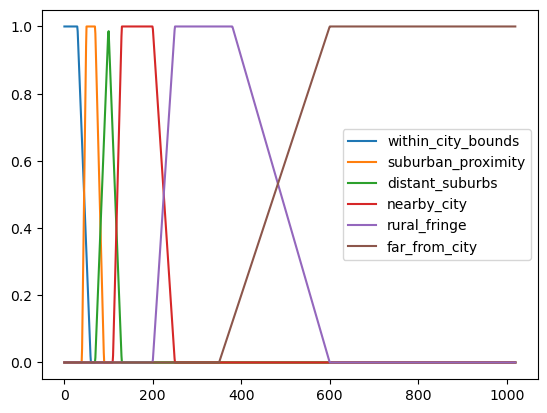

In [134]:
def within_city_bounds(x):
    # if 0.42 <= x <= 30:
    #     return 1
    # elif 30 < x <= 60:
    #     return -1/30 * x + 2
    # else:
    #     return 0
    return trapezoidal(0.42,0.42,30,60)(x)

def suburban_proximity(x):
    # if 40 <= x < 50:
    #     return 1/10 * x - 4
    # elif 50 <= x <= 70:
    #     return 1
    # elif 70 < x < 90:
    #     return -1/40 * x + 5/2
    # else:
    #     return 0
    return trapezoidal(40,50,70,90)(x)

def distant_suburbs(x):
    # if 70 <= x <= 100:
    #     return 1/30 * x - 7/3
    # elif 100 < x <= 130:
    #     return -1/30 * x + 13/3
    # else:
    #     return 0
    return triangle(70,100,130)(x)

def nearby_city(x):
    # if 110 <= x <= 130:
    #     return 1/20 * x - 11/2
    # elif 130 < x <= 200:
    #     return 1
    # elif 200 < x <= 250:
    #     return -1/50 * x + 5
    # else:
    #     return 0
    return trapezoidal(110,130,200,250)(x)

def rural_fringe(x):
    # if 200 <= x <= 250:
    #     return 1/50 * x - 4
    # elif 250 < x <= 380:
    #     return 1
    # elif 380 < x <= 450:
    #     return -1/70 * x + 45/7
    # else:
    #     return 0
    return trapezoidal(200,250,380,600)(x)

def far_from_city(x):
    # if 350 <= x <= 600:
    #     return 1/75000 * x**2 - 13/1500 * x + 7/5
    # elif 600 < x <= 1018.26:
    #     return 1
    # else:
    #     return 0
    return trapezoidal(350,600,1020,1020)(x)

distance_la = [within_city_bounds,suburban_proximity,distant_suburbs,nearby_city,rural_fringe,far_from_city]
show_plots(np.arange(0.42,1020,1),distance_la)


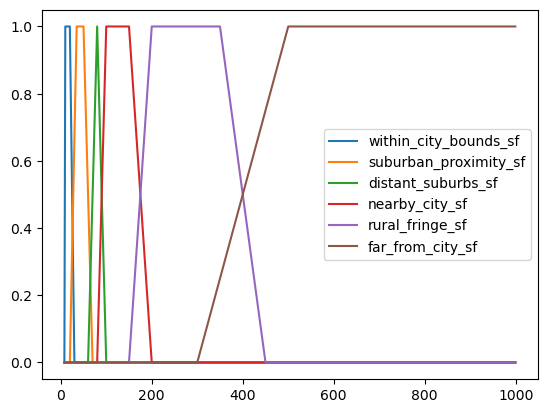

In [136]:
# distance SF

def within_city_bounds_sf(x):
    # if 0.42 <= x <= 30:
    #     return 1
    # elif 30 < x <= 60:
    #     return -1/30 * x + 2
    # else:
    #     return 0
    return trapezoidal(8,10,20,30)(x)

def suburban_proximity_sf(x):
    # if 20 <= x < 35:
    #     return 1/15 * x - 4/3
    # elif 35 <= x <= 50:
    #     return 1
    # elif 50 < x <= 70:
    #     return -1/20 * x + 7/2
    # else:
    #     return 0
    return trapezoidal(20,35,50,70)(x)

def distant_suburbs_sf(x):
    # if 60 <= x <= 80:
    #     return 1/20 * x - 3
    # elif 80 < x <= 100:
    #     return -1/20 * x + 5
    # else:
    #     return 0
    return triangle(60,80,100)(x)

def nearby_city_sf(x):
    return trapezoidal(80,100,150,200)(x)

def rural_fringe_sf(x):
    # if 150 <= x <= 200:
    #     return 1/50 * x - 3
    # elif 200 < x <= 350:
    #     return 1
    # elif 350 < x <= 450:
    #     return -1/100 * x + 9/2
    # else:
    #     return 0
    return trapezoidal(150,200,350,450)(x)

def far_from_city_sf(x):
    # if 300 <= x <= 500:
    #     return 1/50000 * x**2 - 11/1000 * x + 3/2
    # elif 500 < x <= 902.84:
    #     return 1
    # else:
    #     return 0
    return trapezoidal(300,500,1000,1000)(x)
distance_sf = [within_city_bounds_sf,suburban_proximity_sf,distant_suburbs_sf,nearby_city_sf,rural_fringe_sf,far_from_city_sf]
show_plots(np.arange(8,1000,1),distance_sf)